In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv("vitoriaDerrota.csv")
base = base.drop(['Unnamed: 0'],axis=1)
#G = nx.Graph()
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   timeVencedor   100000 non-null  object
 1   timeDerrotado  100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [6]:
tamanho = (113,113)
matrix = np.zeros(tamanho)
print(matrix.shape)
for index,row in base.iterrows():
    listaDerrota = base.iloc[index]['timeDerrotado'].replace("[","").replace("]","").split(',')
    listaVitoria = base.iloc[index]['timeVencedor'].replace("[","").replace("]","").split(',')
    for i in range(len(listaVitoria)):
        for j in range(len(listaDerrota)):
            matrix[int(listaVitoria[i])-1][int(listaDerrota[j])-1] +=1
            matrix[int(listaDerrota[j])-1][int(listaVitoria[i])-1] -=1

(113, 113)


In [152]:
matrix = matrix.astype(int)
print(matrixPositiva)
print(matrix.shape)

[[  0  76   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0 156   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
(113, 113)


In [8]:
print(matrix.mean())

0.0


In [151]:
matrixPositiva = np.where(matrix < 50, 0, matrix)

In [85]:
matrix = np.where(matrix > 0, 0, matrix)

In [86]:
matrix = np.where(matrix == -1, 1, matrix)

In [153]:
unique, counts = np.unique(matrixPositiva, return_counts=True)
dict(zip(unique, counts))

{0: 11361,
 50: 31,
 51: 30,
 52: 18,
 53: 35,
 54: 21,
 55: 31,
 56: 21,
 57: 14,
 58: 35,
 59: 24,
 60: 25,
 61: 24,
 62: 13,
 63: 26,
 64: 16,
 65: 24,
 66: 12,
 67: 21,
 68: 12,
 69: 13,
 70: 19,
 71: 19,
 72: 16,
 73: 21,
 74: 14,
 75: 13,
 76: 18,
 77: 12,
 78: 4,
 79: 13,
 80: 13,
 81: 8,
 82: 7,
 83: 20,
 84: 11,
 85: 8,
 86: 13,
 87: 10,
 88: 12,
 89: 15,
 90: 9,
 91: 6,
 92: 8,
 93: 8,
 94: 7,
 95: 12,
 96: 11,
 97: 10,
 98: 8,
 99: 8,
 100: 11,
 101: 8,
 102: 4,
 103: 4,
 104: 9,
 105: 7,
 106: 10,
 107: 9,
 108: 13,
 109: 9,
 110: 4,
 111: 6,
 112: 6,
 113: 14,
 114: 5,
 115: 9,
 116: 10,
 117: 5,
 118: 7,
 119: 3,
 120: 4,
 121: 8,
 122: 6,
 123: 8,
 124: 8,
 125: 4,
 126: 4,
 127: 1,
 128: 6,
 129: 8,
 130: 7,
 131: 3,
 132: 6,
 133: 5,
 134: 5,
 135: 5,
 136: 5,
 137: 6,
 138: 1,
 139: 3,
 140: 3,
 141: 6,
 142: 3,
 143: 4,
 144: 6,
 145: 3,
 146: 3,
 147: 4,
 149: 4,
 150: 2,
 151: 7,
 152: 7,
 153: 2,
 154: 7,
 155: 3,
 156: 4,
 157: 6,
 158: 3,
 159: 5,
 160: 5,
 161:

In [154]:
df = pd.DataFrame(matrixPositiva)

In [11]:
df = df.drop([23])

In [108]:
df.to_csv("dotaComplementar.mat", index=False)

In [35]:
grafo = nx.from_numpy_matrix(matrixPositiva)

In [155]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,0,76,0,0,0,0,0,0,0,62,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,235,202,0,83,0,0,0,0,0,0,...,205,0,137,0,0,0,0,0,71,0


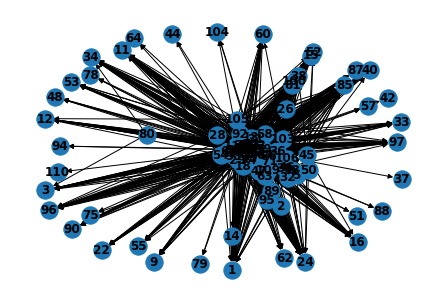

In [147]:
H = nx.DiGraph()
positivos = np.where(matrix>50)
for i in range(len(positivos[0])):
    indice1 = int(positivos[0][i])
    indice2 = int(positivos[1][i])
    peso = int(matrix[indice1][indice2])
    #print(indice1, indice2, peso)
    #print(type(indice1), type(indice2), type(peso))
    H.add_weighted_edges_from([(indice1, indice2, peso)])
nx.draw(H, with_labels=True, font_weight='bold')

In [144]:
print("Numero de nós:", H.number_of_nodes())
print("Numero de arestas:", H.number_of_edges())

Numero de nós: 111
Numero de arestas: 5926


In [112]:
sg = H.subgraph([0,1,2,3,4,5,6,7,8,9])

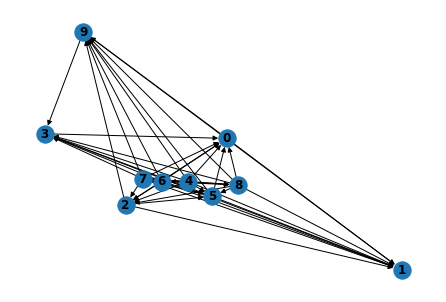

In [115]:
nx.draw(sg, with_labels=True, font_weight='bold')


In [156]:
df.loc[0].describe()

count    113.000000
mean       9.106195
std       31.911810
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      228.000000
Name: 0, dtype: float64

In [164]:
df.loc[58].describe()

count    113.000000
mean       5.185841
std       20.668536
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      152.000000
Name: 58, dtype: float64

In [176]:
print("Grau de entrada: ",H.degree(0))
print("Grau de saída: ",H.out_degree(0))
print("Peso de entrada: ",H.degree(0, weight='weight'))
print("Peso de saída: ",H.out_degree(0, weight='weight'))

Grau de entrada:  45
Grau de saída:  11
Peso de entrada:  6511
Peso de saída:  1029


In [179]:
print("Grau de saída: ",H.out_degree([0,58], weight='weight'))

Grau de saída:  [(0, 1029), (58, 586)]


In [225]:
maior=0
indice=0
for i in range (0,113):
    peso = H.get_edge_data(0,i,default=0)
    if peso!=0:
        if peso.get('weight') > maior:
            maior = peso.get('weight')
            indice = i
print(maior, ' indice: ', indice)

228  indice:  38


In [226]:
maior=0
indice=0
for i in range (0,113):
    peso = H.get_edge_data(i,0,default=0)
    if peso!=0:
        if peso.get('weight') > maior:
            maior = peso.get('weight')
            indice = i
print(maior, ' indice: ', indice)

478  indice:  27


In [205]:
dict = {'Name': 'Zabra', 'Age': 7}
type(dict)

dict